# Exercise 1
Load the dataset WA_Fn-UseC_-Telco-Customer-Churn.csv provided. 
Perform transformations on it so it is prepared to build a model 
(scaling the numerical data and the cathegorical features transformed in numerical integer labels.


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())

# replace missing values in 'TotalCharges' with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
# convert 'TotalCharges' to float type
df['TotalCharges'] = df['TotalCharges'].astype(float)
# fill missing values in 'TotalCharges' with the mean of non-missing values
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# transform categorical features into numerical labels
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for category in categorical_features:
    le = LabelEncoder()
    df[category] = le.fit_transform(df[category])

# scale the numerical data
num_data = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

df[num_data] = scaler.fit_transform(df[num_data])
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Exercise 2

Download from https://www.kaggle.com/ the regression dataset: Student Study Hours. 
        Create a model and make 3 predictions. 
        Make some nice graphics to depict the model (training set, test set, predictions). 

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.94


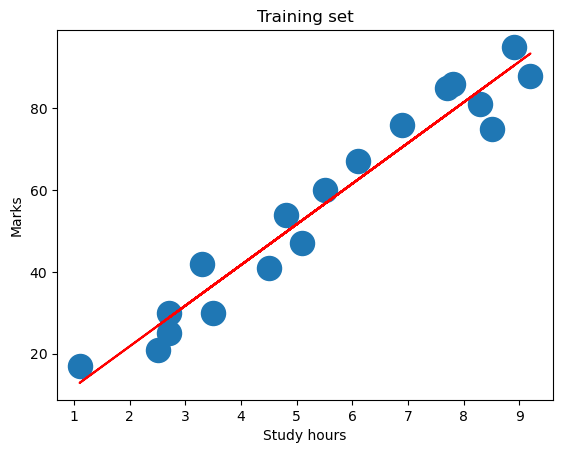

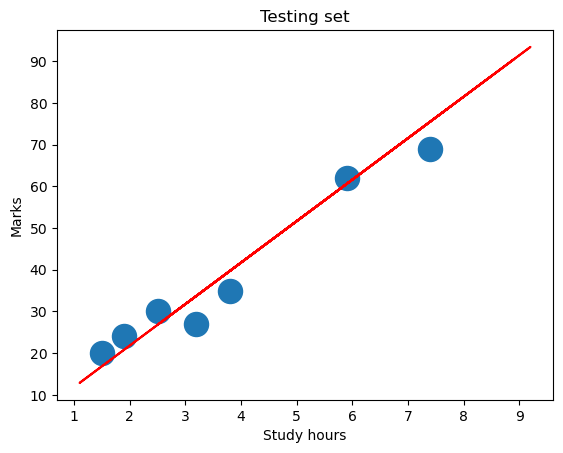

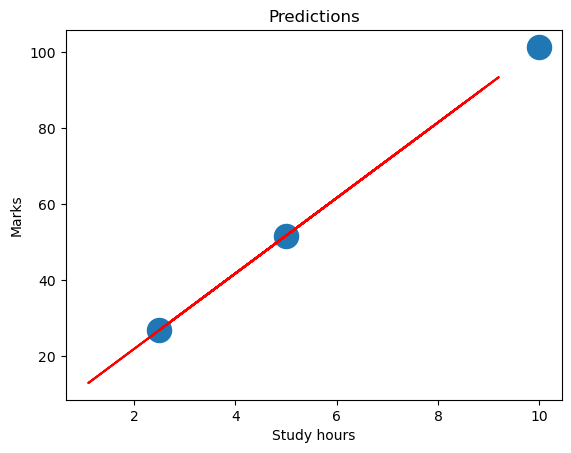

9.941678339488096 * x + 1.932204253151646 = y


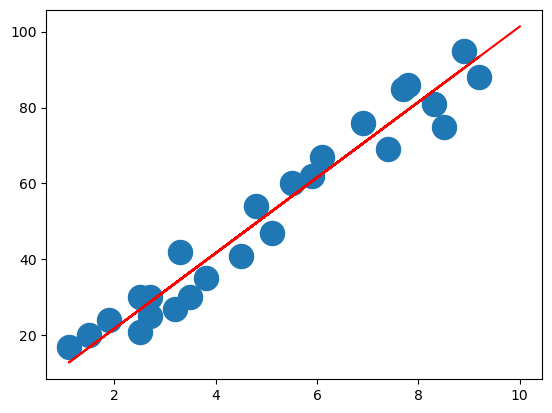

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


# load the dataset into a pandas DataFrame
df = pd.read_csv("student_hours_vs_marks.csv")
print(df.head())

# split the dataset into training and testing sets
X = np.array(df['Hours'])
y = np.array(df['Scores'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# reshape the X list in order to have a two dimensional array
# since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)
print(f"Linear Regression-Training set score: {model.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {model.score(X_test, y_test):.2f}")

# make three predictions
X_new = [[2.5], [5.0], [10.0]]
y_pred = model.predict(X_new)

# plot the training set
plt.scatter(X_train, y_train, s=300)
plt.plot(X_train, model.predict(X_train), color="red")
plt.title("Training set")
plt.xlabel("Study hours")
plt.ylabel("Marks")
plt.show()

# plot the testing set
plt.scatter(X_test, y_test, s=300)
plt.plot(X_train, model.predict(X_train), color="red")
plt.title("Testing set")
plt.xlabel("Study hours")
plt.ylabel("Marks")
plt.show()

# plot the predictions
plt.scatter(X_new, y_pred, s=300)
plt.plot(X_train, model.predict(X_train), color="red")
plt.title("Predictions")
plt.xlabel("Study hours")
plt.ylabel("Marks")
plt.show()


pred = model.predict([[10]])
a = model.coef_[0] # we have one feature with index 0
b = model.intercept_ # a scalar
print(a, "* x +", b, "= y")
x = X.T
best_fit = b + a * (np.append(x, [10]))
plt.scatter(x, y, s=300)
plt.plot(np.append(x,[10]), best_fit, color="red")
plt.plot([10], pred)

# Exercise 3

For your build previous model perform all three regularizations presented here.  

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
import numpy as np
import matplotlib.pyplot as plt


# load the dataset into a pandas DataFrame
df = pd.read_csv("student_hours_vs_marks.csv")
print(df.head())

# split the dataset into training and testing sets
X = np.array(df['Hours'])
y = np.array(df['Scores'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# reshape the X list in order to have a two dimensional array
# since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

print(f"Linear Regression-Training set score: {model.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {model.score(X_test, y_test):.2f}")


ridge = Ridge(alpha=0.7).fit(X_train, y_train)

print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")


lasso = Lasso(alpha=1.0).fit(X_train, y_train)

print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")


elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)

print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.95
Ridge Regression-Training set score: 0.95
Ridge Regression-Test set score: 0.95
Lasso Regression-Training set score: 0.95
Lasso Regression-Test set score: 0.95
Elastic Net-Training set score: 0.95
Elastic Net-Test set score: 0.95
